In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
url = 'http://datasets.flowingdata.com/hot-dog-contest-winners.csv'
df = pd.read_csv('hot-dog-contest-winners.csv')
df.head()

Year                        Winner  Dogs eaten        Country  New record
0  1980  Paul Siederman & Joe Baldini         9.1  United States           0
1  1981               Thomas DeBerry         11.0  United States           0
2  1982                Steven Abrams         11.0  United States           0
3  1983                  Luis Llamas         19.5         Mexico           0
4  1984                Birgit Felden          9.5        Germany           0

In [4]:
df[df["New record"] == 1]

Year                       Winner  Dogs eaten        Country  New record
11  1991             Frank Dellarosa        21.50  United States           1
16  1996              Edward Krachie        22.25  United States           1
17  1997           Hirofumi Nakajima        24.50          Japan           1
20  2000  Kazutoyo "The Rabbit" Arai        25.13          Japan           1
21  2001            Takeru Kobayashi        50.00          Japan           1
22  2002            Takeru Kobayashi        50.50          Japan           1
24  2004            Takeru Kobayashi        53.50          Japan           1
26  2006  Takeru "Tsunami" Kobayashi        53.75          Japan           1
27  2007               Joey Chestnut        66.00  United States           1
29  2009               Joey Chestnut        68.00  United States           1

<AxesSubplot:xlabel='Year'>

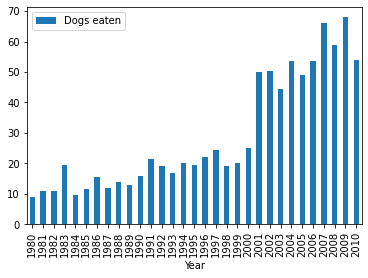

In [5]:
# Quick plot
df.plot.bar(x='Year', y='Dogs eaten')

In [6]:
def colors(array):
    c = []
    for i in array:
        if i == 0:
            c.append('lightgrey')
        else:
            c.append('maroon')
    return c


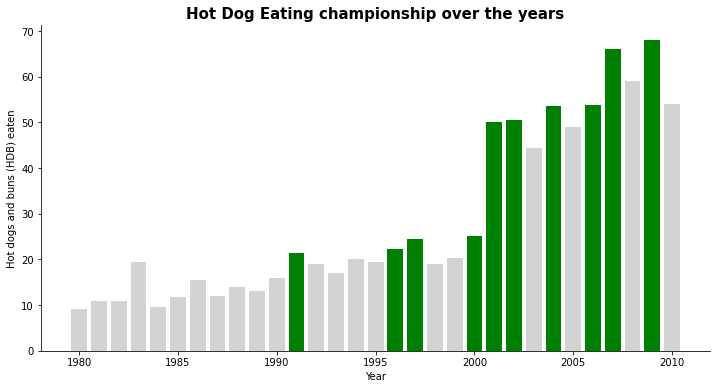

In [7]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)


ax.bar(x = df['Year'], height = df['Dogs eaten'], width=0.8,
       color = ['lightgrey' if i==0 else 'green' for i in df['New record']])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.set_title('Hot Dog Eating championship over the years', {'fontsize': "15",
        'fontweight': "bold",
        'color': 'black',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})
ax.set_xlabel('Year')
ax.set_ylabel('Hot dogs and buns (HDB) eaten')

plt.show()

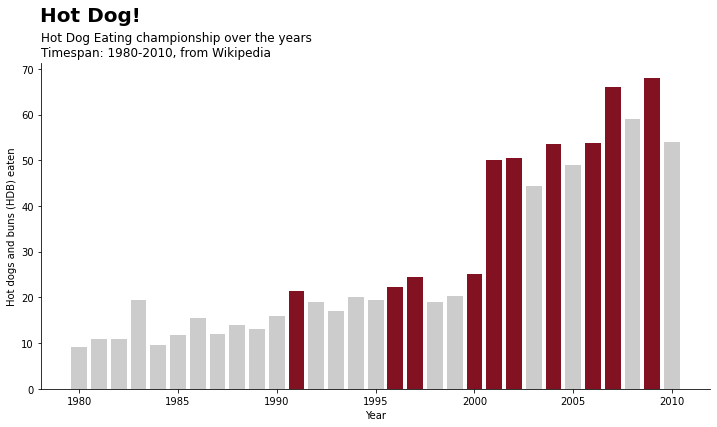

In [8]:
fig = plt.figure(figsize=(12,6))

fig.suptitle('Hot Dog!', x = 0.124, y=1.01, fontsize=20, fontweight='bold', ha='left')

ax = fig.add_subplot(111)


ax.bar(x = df['Year'], height = df['Dogs eaten'], width=0.8,
       color = ['#cccccc' if i==0 else '#821122' for i in df['New record']])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.set_title('Hot Dog Eating championship over the years\nTimespan: 1980-2010, from Wikipedia', loc='left')
ax.set_xlabel('Year')
ax.set_ylabel('Hot dogs and buns (HDB) eaten')

plt.show()

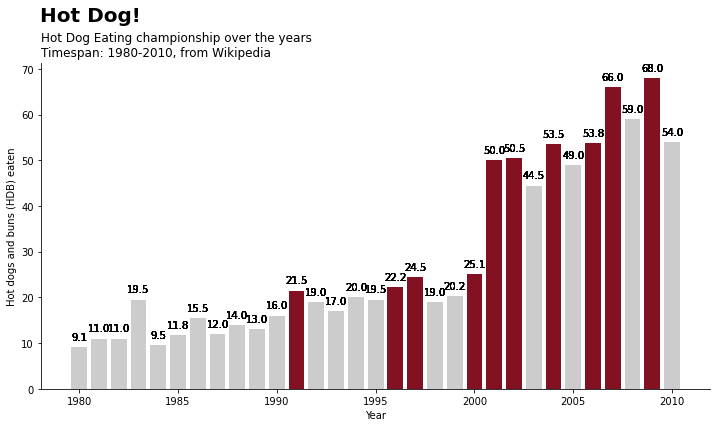

In [9]:
fig = plt.figure(figsize=(12,6))

fig.suptitle('Hot Dog!', x = 0.124, y=1.01, fontsize=20, fontweight='bold', ha='left')

ax = fig.add_subplot(111)


ax.bar(x = df['Year'], height = df['Dogs eaten'], width=0.8,
       color = ['#cccccc' if i==0 else '#821122' for i in df['New record']])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


ax.set_title('Hot Dog Eating championship over the years\nTimespan: 1980-2010, from Wikipedia', loc='left')
ax.set_xlabel('Year')
ax.set_ylabel('Hot dogs and buns (HDB) eaten')

for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)
    
    # Create annotation
    for i in df['New record']:
        if i == 1:
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)                      # Vertically align label differently for
                                            # positive and negative values.




plt.show()

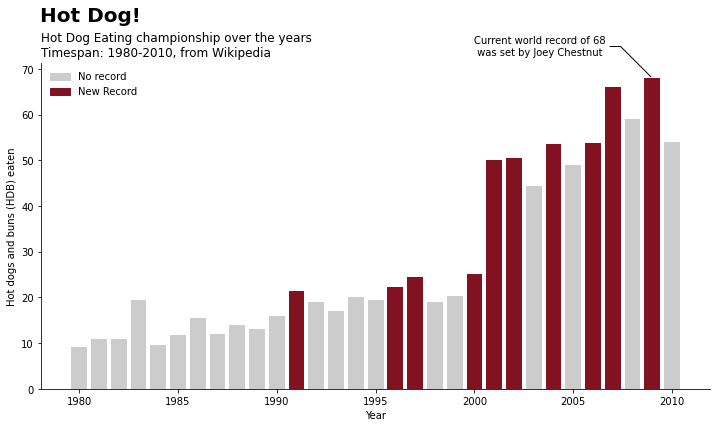

In [10]:
import matplotlib.patches as mpatches

fig, axs = plt.subplots(figsize=(12,6))

# bar chart call with color definition
color = ['#cccccc' if i==0 else '#821122' for i in df['New record']]
bar = axs.bar(x = df['Year'], height = df['Dogs eaten'], width=0.8,
             color = color)

# Superposition title call
fig.suptitle('Hot Dog!', x = 0.124, y=1.01, fontsize=20, fontweight='bold', ha='left')

# drop right and top graph edge
axs.spines["right"].set_visible(False)
axs.spines["top"].set_visible(False)

# legend, title, and axis labels
grey_patch = mpatches.Patch(color='#cccccc', label='No record')
maroon_patch = mpatches.Patch(color='#821122', label='New Record')
plt.legend(handles=[grey_patch, maroon_patch], frameon=False)
axs.set_title('Hot Dog Eating championship over the years\nTimespan: 1980-2010, from Wikipedia', loc='left')
axs.set_xlabel('Year')
axs.set_ylabel('Hot dogs and buns (HDB) eaten')

# Annotation parameters
arrowprops = dict(arrowstyle = "-", connectionstyle = "angle, angleA = 0, angleB = 135") 
x,y = (df['Year'][df['Dogs eaten'] == df['Dogs eaten'].max()], df['Dogs eaten'].max())
record_holder = df['Winner'][df['Dogs eaten'] == df['Dogs eaten'].max()].values[0]
note = f"Current world record of {df['Dogs eaten'].max():.0f}\n was set by {record_holder}"

# Annotation call
axs.annotate(note ,xy = (x,y), xytext = (x-9,y+5), arrowprops = arrowprops)
  
plt.show()

In [11]:
url2 = 'http://datasets.flowingdata.com/hot-dog-places.csv'
df_top_finish = pd.read_csv('hot-dog-places.csv')
df_top_finish

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010
0    25  50.0  50.5  44.5  53.5    49    54    66    59  68.0    54
1    24  31.0  26.0  30.5  38.0    37    52    63    59  64.5    43
2    22  23.5  25.5  29.5  32.0    32    37    49    42  55.0    37

In [12]:
df_top_finish = df_top_finish.T
df_top_finish.columns = ['1st','2nd','3rd']

In [13]:
df_top_finish['Year'] = [x for x in range(2000,2011)]
df_top_finish

1st   2nd   3rd  Year
2000  25.0  24.0  22.0  2000
2001  50.0  31.0  23.5  2001
2002  50.5  26.0  25.5  2002
2003  44.5  30.5  29.5  2003
2004  53.5  38.0  32.0  2004
2005  49.0  37.0  32.0  2005
2006  54.0  52.0  37.0  2006
2007  66.0  63.0  49.0  2007
2008  59.0  59.0  42.0  2008
2009  68.0  64.5  55.0  2009
2010  54.0  43.0  37.0  2010

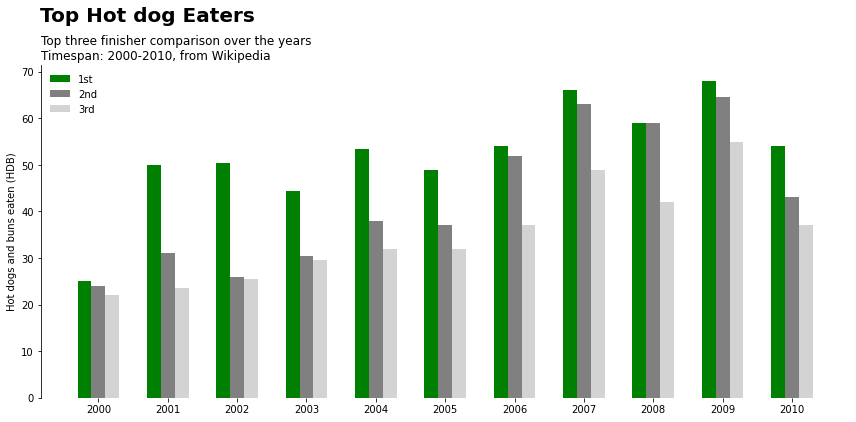

In [14]:
# categorical grouping and bar width
labels = df_top_finish['Year']
w = 0.2

# creating plotting objects fig and axes
fig,ax = plt.subplots(figsize=(12,6))

rect1 = ax.bar(labels - w, df_top_finish['1st'], w, label='1st', color='green')
rect2 = ax.bar(labels, df_top_finish['2nd'], w, label='2nd', color = 'grey')
rect3 = ax.bar(labels + w, df_top_finish['3rd'], w, label='3rd', color = 'lightgrey')

# Superposition title call
fig.suptitle('Top Hot dog Eaters', x = 0.05, y=.97, fontsize=20, fontweight='bold', ha='left')

# drop right and top graph edge
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Hot dogs and buns eaten (HDB)')
# ax.set_xlabel('Year')
ax.set_title('Top three finisher comparison over the years\nTimespan: 2000-2010, from Wikipedia', loc='left')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', frameon=False)

fig.tight_layout()

plt.show()

In [15]:
url_subs = 'http://datasets.flowingdata.com/flowingdata_subscribers.csv'
subs_df = pd.read_csv('flowingdata_subscribers.csv')
subs_df.head()

Date  Subscribers  Reach  Item Views   Hits
0  01-01-2010        25047   4627        9682  27225
1  01-02-2010        25204   1676        5434  28042
2  01-03-2010        25491   1485        6318  29824
3  01-04-2010        26503   6290       17238  48911
4  01-05-2010        26654   6544       16224  45521

In [16]:
subs_df['Date'] = pd.to_datetime(subs_df['Date'])
subs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         31 non-null     datetime64[ns]
 1   Subscribers  31 non-null     int64         
 2   Reach        31 non-null     int64         
 3   Item Views   31 non-null     int64         
 4   Hits         31 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.3 KB


In [17]:
import datetime as dt
subs_df['Day'] = subs_df['Date'].apply(lambda x: x.date().day)

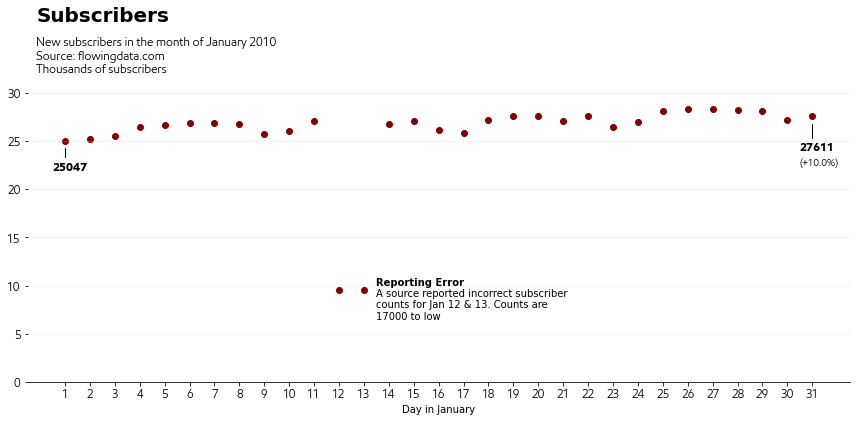

In [18]:
# object initialization
fig, ax = plt.subplots(figsize=(12,6))

# basic chart data 
points = ax.scatter(subs_df['Day'], subs_df['Subscribers']/1000, color='maroon')

# Superposition title call
fig.suptitle('Subscribers', x = 0.046, y=.97, fontsize=20, fontweight='bold', ha='left')

# drop right and top graph edge
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(font='emprint', fontsize=12, label='New subscribers in the month of January 2010\nSource: flowingdata.com\nThousands of subscribers',
             y=1.05, x=0.01, loc='left')
ax.set_xlabel('Day in January')
ax.set_xticks(subs_df['Day'])
ax.set_xticklabels(subs_df['Day'],fontdict= dict(font='emprint', fontsize=12, fontstyle='normal'))
ax.set_yticks([x for x in range (0,31,5)])
ax.set_ylim(bottom=0, top=30)
ax.set_yticklabels([x for x in range (0,31,5)],fontdict= dict( font='emprint', fontsize=12, fontstyle='normal'))


# Annotation parameters
x,y = (subs_df['Day'][subs_df['Subscribers'] == subs_df['Subscribers'].min()], subs_df['Subscribers'].min()/1000)
note = f"A source reported incorrect subscriber\ncounts for Jan 12 & 13. Counts are\n17000 to low"

# Annotation calls
ax.annotate(text='Reporting Error' ,xy = (x,y), xytext = (x+1.5,y+0.5), fontweight='bold')
ax.annotate(note ,xy = (x,y), xytext = (x+1.5,y-3))
arrowprops = dict(arrowstyle = "-", connectionstyle = "angle, angleA = 0, angleB = 90")
ax.annotate(font='emprint', fontsize=12, text=subs_df['Subscribers'].iloc[0] ,
            xy = (1,25-0.5), xytext = (1-0.5,25-3), fontweight='bold', arrowprops=arrowprops)
ax.annotate(font='emprint', fontsize=12, text=subs_df['Subscribers'].iloc[-1] ,
            xy = (31,27), xytext = (31-0.5,27-3), fontweight='bold', arrowprops=arrowprops)

percent = "(+"+str(round(100*(subs_df['Subscribers'].iloc[-1]-subs_df['Subscribers'].iloc[0])/subs_df['Subscribers'].iloc[0],0))+"%)"
ax.annotate(font='emprint', fontsize=10, xy = (31,27), xytext = (31-0.5,27-4.5), fontweight='normal',
            text=percent)

# grid lines
ax.grid(b=True, which='major', axis='y', color='lightgray', alpha=0.3)

fig.tight_layout()


plt.show()

In [19]:
url_world = r'http://datasets.flowingdata.com/world-population.csv'
world_pop = pd.read_csv('world-population.csv')
world_pop.head()

Year  Population
0  1960  3028654024
1  1961  3068356747
2  1962  3121963107
3  1963  3187471383
4  1964  3253112403

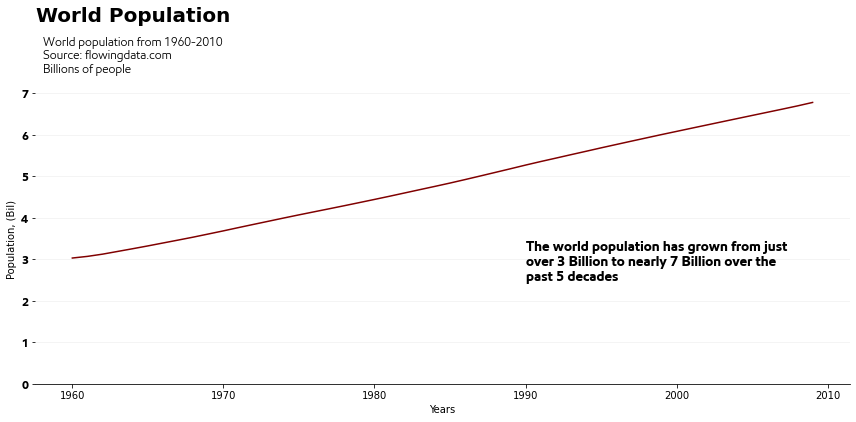

In [20]:
fig,ax = plt.subplots(figsize=(12,6))

# basic plot function
line = ax.plot(world_pop['Year'],world_pop['Population']/1000000000, color='maroon')

# Superposition title call
fig.suptitle('World Population', x = 0.046, y=.97, fontsize=20, fontweight='bold', ha='left')

# drop right and top graph edge
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(font='emprint', fontsize=12, label='World population from 1960-2010\nSource: flowingdata.com\nBillions of people',
             y=1.05, x=0.01, loc='left')
ax.set_xlabel('Years')
ax.set_ylim(bottom=0, top=7)
ax.set_ylabel('Population, (Bil)')
ax.set_yticks([x for x in range(0,8)])
ax.set_yticklabels([x for x in range(0,8)], fontdict= dict(font='emprint', fontsize=12, fontweight='bold'))

# Annotation calls
ax.annotate(text='The world population has grown from just\nover 3 Billion to nearly 7 Billion over the\npast 5 decades',
            xy = (1990,2.5), xytext = (1990,2.5), font = 'emprint', fontweight='bold', fontsize=14)

# grid lines
ax.grid(b=True, which='major', axis='y', color='lightgray', alpha=0.3)

fig.tight_layout()

plt.show()

In [21]:
url_stamps = 'http://datasets.flowingdata.com/us-postage.csv'
stamps = pd.read_csv('us-postage.csv')
stamps

Year  Price
0  1991   0.29
1  1995   0.32
2  1999   0.33
3  2001   0.34
4  2002   0.37
5  2006   0.39
6  2007   0.41
7  2008   0.42
8  2009   0.44
9  2010   0.44

In [22]:
for row in stamps:
    print(row)

Year
Price


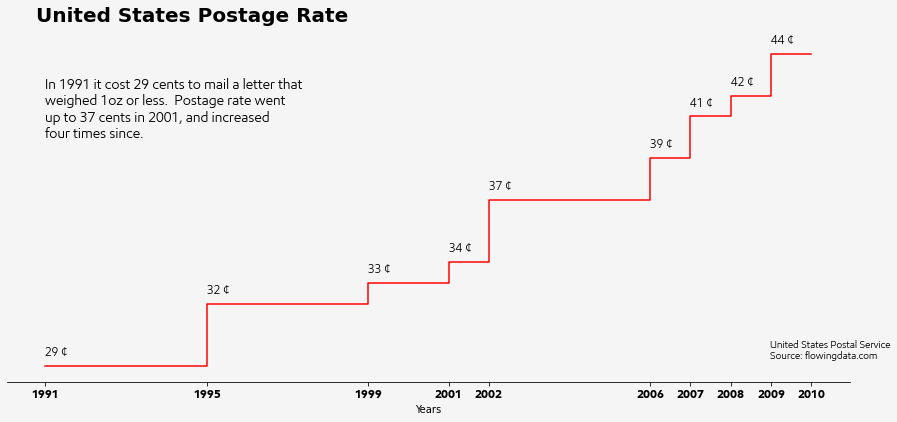

In [23]:
# initialize the plt object
fig, ax = plt.subplots(figsize=(12,6))

# create the plot on the ax object
step = ax.step(stamps['Year'], stamps['Price'], where='post', color='red')

# Superposition title call
fig.suptitle('United States Postage Rate', x = 0.046, y=.97, fontsize=20, fontweight='bold', ha='left')

# drop right and top graph edge
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(font='emprint', fontsize=10, label='United States Postal Service\nSource: flowingdata.com',
             y=.05, x=.905, loc='left')
ax.set_xlabel('Years')
ax.set_xticks(stamps['Year'], minor=False)
ax.set_xticklabels(stamps['Year'], fontdict= dict(font='emprint', fontsize=12, fontweight='bold'))
ax.axes.get_yaxis().set_visible(False)
ax.set_facecolor('#F5F5F5')

# Annotation calls
ax.annotate(text='In 1991 it cost 29 cents to mail a letter that\nweighed 1oz or less.  Postage rate went\nup to 37 cents in 2001, and increased\nfour times since.',
            xy = (1991,0.40), xytext = (1991,0.40), font = 'emprint', fontweight='normal', fontsize=14)

for x,y in zip(stamps['Year'][:-1],stamps["Price"][:-1]*100):
    label = f"{y:.0f} Â¢"
    ax.annotate(label,xy=(x,y/100),xytext = (x,y/100+0.005), font = 'emprint', fontweight='normal', fontsize=12 ) # distance from text to points (x,y))
# grid lines


# final plot characteristics
fig.tight_layout()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('#F5F5F5')

plt.show()

In [24]:
url_empl = 'http://datasets.flowingdata.com/unemployment-rate-1948-2010.csv'
unemp = pd.read_csv('unemployment-rate-1948-2010.csv')
unemp.head()

Series id  Year Period  Value
0  LNS14000000  1948    M01    3.4
1  LNS14000000  1948    M02    3.8
2  LNS14000000  1948    M03    4.0
3  LNS14000000  1948    M04    3.9
4  LNS14000000  1948    M05    3.5

In [25]:
Date = []
for i,j in enumerate(unemp['Year']):
    x = dt.date(unemp['Year'][i],int(unemp['Period'][i].replace('M',"")),1)
    Date.append(x)
    
unemp['Date'] = Date
unemp.head()

Series id  Year Period  Value        Date
0  LNS14000000  1948    M01    3.4  1948-01-01
1  LNS14000000  1948    M02    3.8  1948-02-01
2  LNS14000000  1948    M03    4.0  1948-03-01
3  LNS14000000  1948    M04    3.9  1948-04-01
4  LNS14000000  1948    M05    3.5  1948-05-01

### Working with datetime
Setting the range on the xaxist was challenging for this plot.  After creating the date values for the original plot, there was difficulty in making the plot and having formatting control without destroying the x axis.  It would either try to plot 700+ dates making it unreadible, or the date in years only would show only a range of 50 values squeezed down into the middle of the axis.  

Enter the matplotlib mdates functionality.  This allows a specific year locator function to be called facilitating the year and the format of that point.  Below, I created a 15 year step, and specified that only the year be shown.  This was then used in conjunction within the set_major_locator and set_major_formatter functions to update the years to be shown at the appropriate intervals.  The specific font formatting was conduction just prior using the set_xticks and set_xtick_labels.  Again, order of operations mattered in this context to make it all work. 

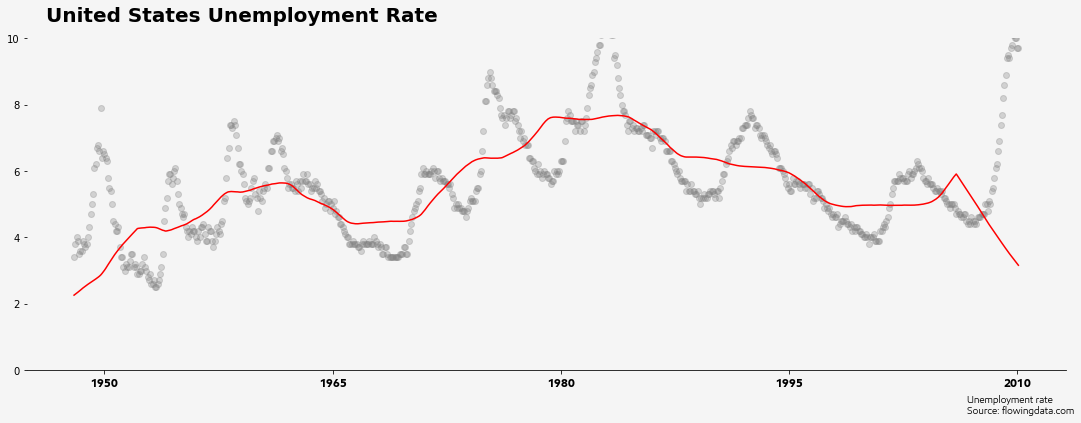

In [59]:
import matplotlib.dates as mdates
years = mdates.YearLocator(15)
years_fmt = mdates.DateFormatter('%Y')

fig,ax = plt.subplots(figsize=(15,6))

dots = ax.scatter( unemp['Date'], unemp['Value'], color='grey', marker='o', alpha=0.3)

def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

unem_avg = movingaverage(unemp['Value'],100)
avg = ax.plot( unemp['Date'], unem_avg, color='red', alpha=1.0)

# Superposition title call
fig.suptitle('United States Unemployment Rate', x = 0.046, y=.97, fontsize=20, fontweight='bold', ha='left')

# drop right and top graph edge
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(font='emprint', fontsize=10, label='Unemployment rate\nSource: flowingdata.com',
             y=-.15, x=.905, loc='left')
ax.set_ylim(0,10)
ax.set_facecolor('#F5F5F5')

# format the ticks
ax.set_xticks(unemp['Date'])
ax.set_xticklabels(unemp['Date'],fontdict= dict(font='emprint', fontsize=12, fontweight='bold'))
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.axes.get_yaxis().set_visible(True)

# figure formatting
fig.tight_layout()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('#F5F5F5')

plt.show()

### Order of chart elements
In this example, the chart concept above was recreated with the use of a polyfit function, and replotted.  After a number of fits and starts, and lots of googling, a post on curve fitting at stack demonstrated that the overall figure defaults to the plotting order of operations, with the second data set plotted, or the last, being the basis for the axes on the figure.

Below, I moved the poly fit creation and plotting above the main data set points.  Then all of the axis definitions work for annotation and formating.  This was not highlighted, but demonstrated in the post: 

https://stackoverflow.com/questions/17638137/curve-fitting-to-a-time-series-in-the-format-datetime?noredirect=1&lq=1

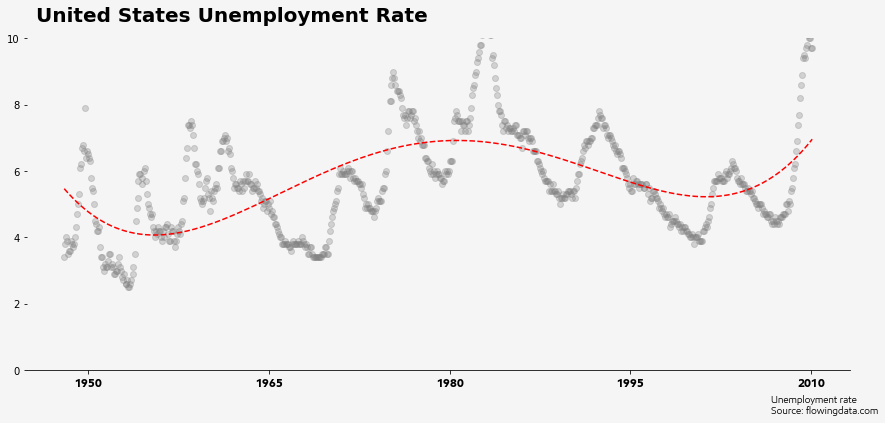

In [60]:
import matplotlib.dates as mdates

fig,ax = plt.subplots(figsize=(12,6))

x = mdates.date2num(unemp['Date'])

# calc the trendline
z = np.polyfit(x,unemp['Value'], 4)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

# the line equation:
# print("y=%.6fx+(%.6f)"%(z[0],z[1]))

dots = ax.scatter(unemp['Date'], unemp['Value'], color='grey', marker='o', alpha=0.3)

# Superposition title call
fig.suptitle('United States Unemployment Rate', x = 0.046, y=.97, fontsize=20, fontweight='bold', ha='left')

# drop right and top graph edge
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(font='emprint', fontsize=10, label='Unemployment rate\nSource: flowingdata.com',
             y=-.15, x=.905, loc='left')
ax.set_ylim(0,10)
ax.set_facecolor('#F5F5F5')

# format the ticks
years = mdates.YearLocator(15)
years_fmt = mdates.DateFormatter('%Y')
ax.set_xticks(unemp['Date'])
ax.set_xticklabels(unemp['Date'],fontdict= dict(font='emprint', fontsize=12, fontweight='bold'))
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.axes.get_yaxis().set_visible(True)

# figure formatting
fig.tight_layout()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('#F5F5F5')

plt.show()